In [ ]:
# 일간 데이터를 월별 데이터로 구조 변경
# 월 - [일자별 데이터] : dictionary 형식

In [2]:
# 1. 전체 데이터 읽기
import csv

with open("data-files/seoul-temperature.csv") as f:
    reader = csv.reader(f)

    rows = []
    for row in reader:
        row[0] = row[0].strip("\t")
        rows.append(row)
        
source_rows = rows.copy()

In [5]:
rows[1][0][5:7]

'10'

In [7]:
# 월별로 데이터 재구성
data_by_month = {}
for row in rows:
    month = row[0][5:7] # '2023-03-08' -> '03'
    if month in data_by_month: # dict에 month 키가 있는지 확인
        data_by_month[month].append(row) # 있으면 추가
    else:
        data_by_month[month] = [row] # 없으면 새로 생성

In [9]:
from collections import defaultdict # dict의 초기 값 자동 관리

data_by_month2 = defaultdict(list) # list 형식을 값으로 사용하는 defaultdict
for row in rows:
    month = row[0][5:7] # '2023-03-08' -> '03'
    data_by_month2[month].append(row)
   

In [11]:
print( data_by_month["01"][:5] )
print( data_by_month2["01"][:5] )

[['1908-01-01', '108', '-5.9', '-9.1', '-1.3'], ['1908-01-02', '108', '-7.7', '-13.9', '-3'], ['1908-01-03', '108', '-6.2', '-10.8', '-2.9'], ['1908-01-04', '108', '-7.5', '-12.8', '-1.7'], ['1908-01-05', '108', '-4.8', '-11.3', '-0.1']]
[['1908-01-01', '108', '-5.9', '-9.1', '-1.3'], ['1908-01-02', '108', '-7.7', '-13.9', '-3'], ['1908-01-03', '108', '-6.2', '-10.8', '-2.9'], ['1908-01-04', '108', '-7.5', '-12.8', '-1.7'], ['1908-01-05', '108', '-4.8', '-11.3', '-0.1']]


In [17]:
# "05"월의 (평균기온의) 평균
# data_by_month["13"] # "13"에 해당하는 키가 없으면 오류
data = data_by_month.get("03", None)
if data == None:
    print("데이터가 없습니다.")
else:
    sum_value = 0
    cnt = 0
    for row in data:
        if row[2] != '':
            sum_value += float(row[2])
            cnt += 1

    print(sum_value / cnt)

4.5157849338700435


In [18]:
# 특정월의 (평균기온 or 최저기온 or 최대기온의) 평균
def mean_temperature_by_month(month, t='mean'):
    data = data_by_month.get(month, None)
    if data == None:
        return None
    else:
        sum_value = 0
        cnt = 0
        c_index = 2 if t == 'mean' else ( 3 if t == 'min' else 4 )
        for row in data:
            if row[c_index] != '':
                sum_value += float(row[c_index])
                cnt += 1

        return sum_value / cnt

In [21]:
print( mean_temperature_by_month("01", 'max'))

0.7849557522123894


In [25]:
# 1 -> "01", 10 -> "10"
"{0:02d}".format(1), "{0:02d}".format(10)

('01', '10')

In [30]:
# 월별 평균 기온 리스트 만들기

means_by_month = []
for month in range(1, 13):
    month_str = "{0:02d}".format(month)
    mean_value = mean_temperature_by_month(month_str, "mean")
    means_by_month.append(mean_value)

means_by_month2 = [ mean_temperature_by_month("{0:02d}".format(m), 'mean') for m in range(1, 13) ]

In [32]:
means_by_month[:5], means_by_month2[:5]

([-3.5340565229803076,
  -0.9031328320802009,
  4.5157849338700435,
  11.46705357142855,
  17.012298387096774],
 [-3.5340565229803076,
  -0.9031328320802009,
  4.5157849338700435,
  11.46705357142855,
  17.012298387096774])

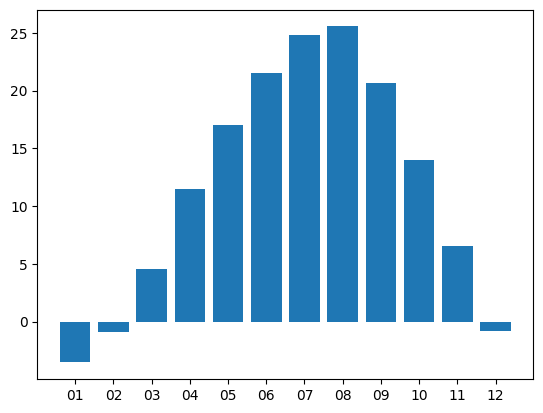

In [33]:
import matplotlib.pyplot as plt

x = ["{0:02d}".format(m) for m in range(1, 13)] # [1, 2, 3, ...] -> ['01', '02', '03', ...]
plt.bar(x, means_by_month)
plt.show()

In [ ]:
# covid-19 데이터 사용
# 년도-월 기준으로 데이터 집계 : 딕셔너리 형식 사용 -> { '2020-02' : [], '2020-03' : [] }
# 월별 자치구별 신규 발생 건수의 평균을 반환하는 함수 만들기
# 전체 기간의 월별 데이터로 bar plot 표시

In [34]:
# 1. 파일 데이터 읽기
import csv

with open("data-files/seoul-covid-19.csv", "rt", encoding="utf-8") as f:
    covid_reader = csv.reader(f)

    titles = next(covid_reader) # next : 목록(iterator)에서 다음 행으로 이동 ( 제목 표시 행 건너뛰기 )

    covid_rows = []
    for row in covid_reader:
        row[1:] = map(lambda v: int(v) , row[1:]) # 1번째 요소부터 마지막 요소까지 숫자로 변경
        covid_rows.append(row)

In [48]:
# { 'yyyy.MM' : [] } 형식의 데이터 구성
from collections import defaultdict

data_by_year_month = defaultdict(list)
for row in covid_rows:
    if len(row[0]) == 13:
        ym = row[0][:7]
    else:
        ym = "20" + row[0][:5]
    data_by_year_month[ym].append(row)


In [50]:
def mean_by_gu_and_year_month(gu, year, month):

    col_idx = -1
    for idx, title in enumerate(titles):
        if gu in title and "추가" in title:
            col_idx = idx
            break

    if col_idx == -1:
        return None

    year_month = "{0:04d}.{1:02d}".format(year, month)
    data = data_by_year_month.get(year_month, None)
    if data == None:
        return None
    else:
        sum_value = 0
        cnt = 0
        for row in data:
            sum_value += row[col_idx]
            cnt += 1
        
        return sum_value / cnt

In [52]:
mean_by_gu_and_year_month("송파", 2022, 2)

1245.142857142857

In [53]:
gu = "송파"
y = []
x = []
for year in range(2020, 2024):
    for month in range(1, 13):
        mean_value = mean_by_gu_and_year_month(gu, year, month)
        if mean_value != None:
            y.append( mean_value )
            x.append( "{0:04d}.{1:02d}".format(year, month) )

In [55]:
y[:5], x[:5]

([0.48, 0.41935483870967744, 0.4, 0.3548387096774194, 0.23333333333333334],
 ['2020.02', '2020.03', '2020.04', '2020.05', '2020.06'])

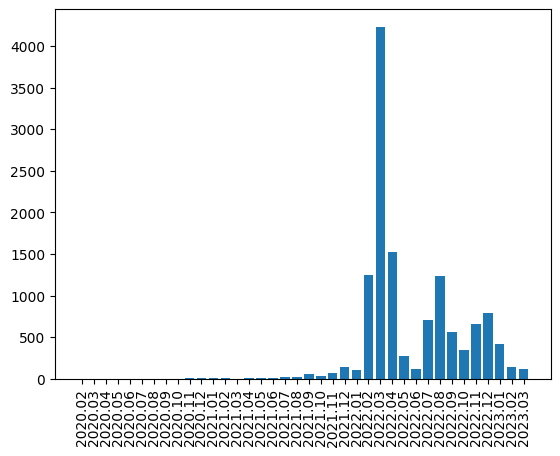

In [57]:
import matplotlib.pyplot as plt

plt.bar(x, y)
plt.xticks(x, rotation=90)
plt.show()